# Tutorial (SOLUTIONS) 1: Numbers

It seems obvious that real numbers $\mathbb{R}$ are a key element of computation. But there are some subtle aspects to numbers that it's worth thinking about. We think of numbers alnog a line like this:

![Number line](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d7/Real_number_line.svg/1000px-Real_number_line.svg.png)

You are told that "almost all" of the numbers on this line are irrational. That means if you throw a dart at the line you should never "hit" a rational number. The irrationals fill the entire line. 

But there is a paradox:

*No one has ever met a true irrational number in person. We hear a lot of name droping. People say things like, "I know $\pi$ and $e$." They are big celebrities in some circles. But no one's ever really seen them in their total infinity. Only fleeting glimpses as they run down the street and jump into a limo.*

My person view: Irrational numbers are a convinent fiction. They are "defined" as the completion of the rationals under limits of Cauchy sequences. What?

Say you have a sequence of rationals (ie "fractions" or ratios of integers), $r_{0}, r_{1}, r_{2}, \ldots, r_{n}, r_{n+1}, \ldots$. And say you have a way of comparing the distance between any two numbers,

$$ | r_{n} - r_{m} |. $$

Now say that for any tiny number you pick, say 1/1,000,000,000, or 1/1,000,000,000,000, or $10^{-16}$. You can always find an $n$ and and $m$ where 

$$ | r_{n} - r_{m} |  < 10^{-16}.$$

And if someone had said $10^{-\mathrm{googolplex}}$, we would have been able to find an $n$ and $m$ for that too. 

We call this kind of sequence of rational number a ***Cauchy sequence***. It looks like it's going somewhere. But at every step of the way, it's just a bunch of rational numbers. 

The thing about these kinds of sequences is that there may not be a rational number at the end of it. The definition is to just make a bigger set of numbers that includes these limits and go on our way as if nothing was ever awkward.

***Here's an example of one such sequence. A seq that converges on sqrt(2)***

Take $r_{0} = 1$.  At every step of the sequence, define 

$$r_{n+1} = \frac{r_{n}+2}{r_{n}+1}$$

Nothing but a bunch of rationals all the way... It's also possible to prove that the terms get closer and closer together. 

**LECTURE'S PERSONAL NOTE:** 

It is my personal belief that a lot of students think of "Take the limit as $n\to \infty$" as very conceptually similar to "plug in the vaule $n=\infty$." At least my friends and I thought this way as students far into our education. There is good reason for this sometimes. I still do it when I'm in a hurry. And it works on paper sometimes. But this is the beauty of computers. They *will just not let you "plug in $\infty$"*. OK, they do allow it sometimes. They sometimes have a number called `inf`. And you can use this productively sometimes. But you sure better know what you are doing! If you use `inf`, you also better get used to the idea of `nan`, which mean "not a number". See the examples below.

Computers make you realise that everyting useful is finite. And the infinite is just the idea that you can keep doing something as long as you want. And maybe you can make a good guess where the result is going. But you'll *never* actually get to the end. 

In [1]:
import numpy as np
print(1/np.inf)
print(1+np.inf)
print(1-np.inf)
print(np.inf*np.inf)
print(np.inf+np.inf)
print(np.inf/np.inf)
print(np.inf-np.inf)
print(1 + np.nan)
print(np.inf*np.nan)

0.0
inf
-inf
inf
inf
nan
nan
nan
nan


`inf` can get into a calculation and things can still turn out ok. But used the wrong way, `inf` can turn to it's evil partner, `nan`. Anything `nan` touches turns to `nan`.

**BACK TO OUR REGULARLY SCHEDULED PROGRAM**

**TASK 0**: Analytically determine the limiting value of the recursive sequence $r_{n}$. This where the sequence doesn't change anymore; $r_{n+1} = r_{n}$. Practise writing your answer using Markdown in the space below.

**SOLUTION 0:** 

The fixed-point value is defined by:

$$r_{\infty} = \frac{r_{\infty} + 2}{r_{\infty}+1} $$

or

$$ r_{\infty}(r_{\infty}+1) \ = \ r_{\infty} + 2$$

or

$$ r_{\infty}^{2} \ = \ 2 $$

or 

$$r_{\infty} \ = \ \pm \sqrt{2}$$

If we start with positive values we remain positive. Therefore

$$r_{\infty} \ = \ \sqrt{2}$$

We hope 

$$ 
\lim_{n\to \infty} r_{n}^{2} \ = \ 2
$$

**TASK 1**: Write a recursive function that generates the $n$th term in this sequence. Show that the terms get closer to eachother. 

**SOLUTION 1:**

In [2]:
# Define function here
def r(n):
    if n == 0: return 1
    x = r(n-1) # only call r(n-1) once! 
    return (x+2)/(x+1)

In [3]:
# Test function here
print(r(0))
print(r(1))
print(r(2))
print(r(100)**2 - 2)
print('Seems to work.')

1
1.5
1.4
4.440892098500626e-16
Seems to work.


Warning: you will have to reboot the Kernal if you type np.inf into your function. Why?

**TASK 2:** Can we find integers, $i_{n}$, such that 

$$ r_{n} = \frac{i_{n} + i_{n-1}}{i_{n}} \quad ?$$

Show that the following sequence works 

$$ i_{n+1} = 2 i_{n} + i_{n-1}.$$

for some starting values, $i_{-1}$, and $i_{0}$. Find the starting values that make this work. 


Does this sequence look similar to another (perhaps simpler) sequence you've seen in your education so far? There is a good reason for that. We'll learn more about why a little later.

**SOLUTION 2:**

Math pro tip: If you want to see if two things are the same, then subtract them.

$$ r_{n+1} - \frac{r_{n}+2}{r_{n}+1} \ = \ \frac{i_{n+1}+i_{n}}{i_{n+1}} -   \frac{3 i_{n}+i_{n-1}}{2i_{n}+i_{n-1}} \ = \ i_{n}\left(\frac{1}{i_{n+1}} - \frac{1}{2 i_{n} + i_{n-1}} \right)$$

The left-hnad side is zero if $i_{n}=0$ for all $n$; which is not what we want. Or if

$$i_{n+1} = 2 i_{n} + i_{n-1}\quad \mathrm{QED}.$$

We want 

$$r_{0} \ = \  1 \ = \ \frac{i_{0}+i_{-1}}{i_{0}} \ = \ 1 + \frac{i_{-1}}{i_{0}} $$

This works as long as $i_{-1} \ = \ 0$, and $i_{0} \ne 0$. We can pick $i_{0}$ to be anything we want otherwise. A good values is $i_{0} = 1$. 

**TASK 3:** write a recursive function that generates the sequence $i_{n}$. Take the ratio in TASK 2 and show the result is the same as the function output in TASK 1.

***SOLUTION 3:*** Here are two way you could do the same thing:

In [4]:
def i(n):
    if n <  0: return 0
    if n == 0: return 1
    return 2*i(n-1) + i(n-2)

def matrix_power(matrix,n):
        if n == 0: return np.array([[1,0],[0,1]])
        return matrix.dot(matrix_power(matrix,n-1))

def i_matrix(n):
    
    if n <  0: return 0
    if n == 0: return 1

    Q = matrix_power(np.array([[2,1],[1,0]]),n)

    return Q[0,0]

In [1]:
for n in range(10): print( i(n) == i_matrix(n))

NameError: name 'i' is not defined

One of these function is a lot faster than the other.  Let's quantify this.

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

import time 

def measure_time(fun,arg,nreps=1):
    t = time.time()
    for k in range(nreps):
        fun(arg)
    t -= time.time()
    t /= -nreps
    return t

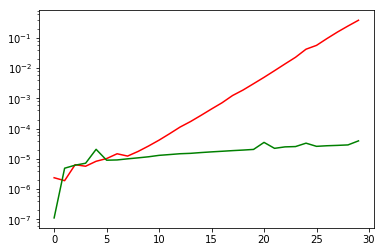

In [7]:
nmax=30
time0, time1 = np.zeros(nmax), np.zeros(nmax)
for n in range(nmax):
    time0[n] = measure_time(i,n)
    time1[n] = measure_time(i_matrix,n,nreps=300)

plt.semilogy(time0,color='red')
plt.semilogy(time1,color='green')

It would be possible to speed this up even more with a `fast_matrix_power` function.

## The decimal system

When you look at the output of your $r_{n}$ function, you'll notice that you get the answer in perfectly sensible decimal numbers. This is just one convienent way of representing sequences of rational numbers with higher and higher precision.

$$x = \lim_{D\to \infty}\ \sum_{i=-D}^{D} d_i 10^{i},$$

with 

$$d_{i} \in \{0,1,2,3,4,5,6,7,8,9\}.$$

Notice that I took the limit as the range of terms $[-D,+D]$ goes to $\infty$. This is becuase we can't really ever get everyting in one place. 

The Decimal system is just one more way of looking at sequences of rational numbers. And we know there are some drawbacks to this also.  Numbers like $1/3$ have decimal representations that go on repeting forever. If you want to represent $1/3$ exactly you need to use a base-3 system. 

But we still need to calculate with numbers like $pi$ and $1/3$. But we cannot fit them in our finite computers. This leads to one of the two main sources of error in computations. 


## The binary system 
Virtually every computer uses binary to store numbers. A binary number system uses only two values, canonically 0 and 1, in each digit, as opposed to the ten we use in decimal. Very briefly, here is a short table showing the conversion of the first ten integers from decimal to binary:

|Decimal|Binary|
|-------|------|
|00|0000|
|01|0001|
|02|0010|
|03|0011|
|04|0100|
|05|0101|
|06|0110|
|07|0111|
|08|1000|
|09|1001|
|10|1010|

Each digit of the binary number is called a "bit" ("binary digit"). Thus, the bit is the smallest unit of computer memory. One "byte" is 8 bits. 

Just as an arbitrary number can be written in decimal as an arbitrary number can be written in binary as 

$$x = \lim_{B\to\infty}\  \sum_{i=-B}^{B} b_i 2^{i},$$

Now

$$b_{i} \in \{0,1\}.$$


Decimal and binary system (and all other integer-base systems) have the nice property that they are (almost) "unique". That is if any two numbers have the same binary or decimal expansion, then they are the same number.

There is one important exception to this. In decimal, the number 

$$u =  0.9999999999999999999\ (\mathrm{repeting})$$

is not it's own number. This number is equal to $u=1$. In binary the same is true for

$$u = 0.11111111111111111 \ (\mathrm{repeting}).$$

There are a lot of clever ways to prove these. We saw a hint about this in Lecture 01.  

**TASK 04:** Use the following (finite) geometric series formula to prove $u=1$ from above:

$$(q-1) \sum_{i=1}^{n} q^{-i} \ = \ 1 - q^{-n}$$


**SOLUTION 4:**

Assume $q=10$ for base-10:

Then 

$$0.9000 = 9 \times 10^{-1}$$

$$0.9900 = 9 \left( 10^{-1} + 10^{-2}\right)$$

$$0.9990 = 9 \left( 10^{-1} + 10^{-2} + 10^{-3}\right)$$

$$0.9999 = 9 \left( 10^{-1} + 10^{-2} + 10^{-3} + 10^{-4}\right)$$

And so on. For $n$ 9s:

$$ 0.9....9000 \ = \  9 \sum_{i=1}^{n} 10^{-i} \ = \ 1 - 10^{-n} $$

$$ 0.9999999999999999999\ (\mathrm{repeting}) \ = \ \lim_{n\to \infty} ( 1 - 10^{-n}) \ = \ 1$$.

The same is true in base-2.

**Experimenting with binary:**

`numpy` provides a function (`np.binary_repr()`) to convert *integers* into their binary represenation. Let's practice a bit by using it. Try changing $n$ below. Try a bunch of numbers to get a feel for how binary works. You might try putting `np.binary_repr()` into a loop.

In [8]:
import numpy as np

In [9]:
n = 42

np.binary_repr(n)

'101010'

**TASK 05:** Insert a new cell below. See what happens when you try to give a floating point number (e.g. 43.2) to `np.binary_repr()`. Read the output carefully. 

**SOLUTION 5:**

In [10]:
print('It aint gonna like it:')
np.binary_repr(43.2) 

It aint gonna like it:


TypeError: 'float' object cannot be interpreted as an integer

** EVERYTHING FROM HERE ON IS JUST EXPERIMENTING. THERE ARE NO 'SOLUTIONS'. BUT YOU ARE GOING TO WANT TO GET AN UNDERSTANDING OF BINARY. IT MAY SHOW UP LATER. **

## Floating Point Numbers

Throughout this class, we will need to work with computer representations of real numbers: we'll be adding, subtracting, dividing, and multiplying them in order to solve complex problems regarding the world. As an example, The observable physical universe covers length scales from the size of the proton, $l_p \sim 10^{-14}\ \mathrm{m}$,\* to the size of the observable universe, $L_u \sim 10^{27}\ \mathrm{m}$. Taking the ratio of $L_u/l_p \simeq 10^{41}$, we see there is a factor of $10^{41}$ between the smallest and largest length scales. 

In order to cover quantities over a large "dynamic range", we typically use scientific notation in our paper-and-pencil work, and computers do very much the same thing.  The only tricky part is that the number, which we like to represent in decmial form, is stored in binary. 

Let's analyze scientific notation. Take an interesing small number. For example, the mass of an electron $ \mu = 9.10938356 \times 10^{-31} \mathrm{kg}$. 

We can write this schematically as 

$$ \mu = (-1)^s\ m\ \times 10^e,$$

where $s=0$ is called the *sign*, $m= 9.10938356$ the *mantissa* (or significant), and $e=-31$ the *exponent*. 

Of course, the computer stores the number $\mu$ in binary, so it must be converted. We'll use the notation $N_{10}$ to mean a number $N$ in base 10, and $N_{2}$ to mean a number in base 2. For example $10_{10} = 1010_{2}$. 

## IEEE 754

https://en.wikipedia.org/wiki/IEEE_floating_point

There are many ways of storing floating point numbers on a computer; we will only describe one: IEEE 754. This is the most widely used standard for representing these numbers. An IEEE 754 number is represented in the following way:

$$ x = (-1)^s\ 1.f\ \times 2^{e-B},$$

where $s$ is the sign, $f$ is the *fractional part* of the mantissa (note that there is 1 in front), $e$ is the exponent of the number you want to represent, and $B$ is called the *bias*. Note that the total exponent stored in memory $e$  has no sign bit and is thus **always positive**. This explains the need for the bias: if we want to represent actual exponents $p = e -B < 0$, $B>0$. A floating point number standard that can't hold the mass of an electron is not very useful to scientists. The bias $B = 127$ for single precision, and 

IEEE 754 defines two different kinds of floating point numbers: single and double precision. Single precision floating point numbers are called `float`s and take up 32 bits of memory, and double precision is called `double` and take up 64 bits of memory. 

**Unfortunately, python doesn't respect this naming convention**, chosing instead to use `float` to mean a 64-bit number, and `float32` to mean a 32-bit number. This is only mildly annoying in practice, since you'll probably never need a 32-bit float in this class. Computer 15 years ago all used 32-bit number as defaults. They pretty much all switched over at some point to using 64-bit defaults. Maybe on day, this will change to 128-bit. But for now that is also an option that will slow down computations. 

We'll use 32-bit single precision as our example here, even though you will almost always work in double precision. A 32 bit `float` uses 1 bit to hold the sign $s$, 8 bits to hold the exponent $e$, and the remaining 23 bits to hold the mantissa. Let's consider the exponent first. With 8 bits, the largest value that can be held is with all 8 digits set to 1, 11111111:

Convert a binary digit written as a string (that is, in quotes) prefaced with '0b' to decimal integers

In [11]:
int('0b11111111',base=2) 

255

The smallest value is 00000000:

In [12]:
int('0b00000000',base=2) 

0

So, $0 \leq e \leq 255$. In IEEE 754, $e=0$ and $e=255$ are special, so normal numbers are restricted to $0 \lt e \lt 255$. 

The fractional part of the mantissa is 23 bits wide, plus the 1 we assue leads the mantissa, for a total of 24 digits. So the largest possible mantissa is (remember, this is really a binary *fraction*: 1.11111111111111111111111)

In [13]:
int('0b111111111111111111111111',base=2)*2**-23

1.9999998807907104

So, putting these together, the largest digit we can store is 

In [14]:
m = int('0b111111111111111111111111',base=2)*2**-23
bias = 127
exp = 2**(254-bias)

print("{:20.15e}".format(m*exp))

3.402823466385289e+38


As mentioned above, the case $e = 0$ is a special one. In this case, the 23 mantissa bits represent the entire mantissa, and the leading digit is zero (instead of one, as is usual). Also, the total stored exponent will be -126. So, the smallest number is thus

In [15]:
m = int('0b000000000000000000000001',base=2)*2**-23
exp = 2**(-126)

print("{:20.15e}".format(m*exp))

1.401298464324817e-45


### Simfloat

We're going to use the simfloat package to simulate floating point numbers. This allows us to look easily at what the binary representation is.

**Note: This package might be buggy!** If you have any problems, let me know. Don't worry, we're not going to be using it for any marked assignments. It's just for fun.

In [16]:
import simfloat as sf

In [17]:
context = sf.single # this is a predefined single-precision floating point simulation

Modify the cells below to get a feel for binary represenations of common decimal digits. Note when the mantissa becomes totally full, and when it's not. Think about what that sometimes means in decimal (e.g. think about 1/3!), and what implications that has for computation on binary computers. 

In particular, try 1, 0.1, 0.5, and 1/3.

In [18]:
x = context(11)

print(x)

0 10000010 01100000000000000000000


In [19]:
1.625*2**-113

1.5648180798146291e-34

In [20]:
x = context(1.5648180798146291e-34)
print(x)

0 00001110 10100000000000000000000


In [21]:
x = context(-1)
print(x)

1 01111111 00000000000000000000000


In [22]:
x = context(np.nan)
print(x)

0 11111111 11111111111111111111111
